## Tasks
Assigned to Sierra Stevenson, JSIP intern under Dr. Jonathan Jiang and Dr. Longtao Wu

List of Tasks<p>
[DONE]&nbsp;&nbsp;&nbsp;Task 1 — UM moisture at 100 hPa map<br>
[DONE]&nbsp;&nbsp;&nbsp;Task 2 — MLS moisture at 100 hPa map<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Task 3 — UM/MLS/AIRS vert. profiles moisture vs temp/pressure<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Task 4 — UM/MLS PDFs (moisture)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Task 5 — UM/GPM_MERGIR PDFs (brightness temp)

## Code
Setup

In [1]:
# NASA Earthdata authorization
from subprocess import Popen
from getpass import getpass
import platform
import os
import shutil

# Data analysis
import xarray as xr
import numpy as np

Access GPM Data Archive

In [2]:
urs = 'urs.earthdata.nasa.gov'    # Earthdata URL to call for authentication
prompts = ['Enter NASA Earthdata Login Username \n(or create an account at urs.earthdata.nasa.gov): ',
           'Enter NASA Earthdata Login Password: ']

homeDir = os.path.expanduser("~") + os.sep

with open(homeDir + '.netrc', 'w') as file:
    file.write('machine {} login {} password {}'.format(urs, getpass(prompt=prompts[0]), getpass(prompt=prompts[1])))
    file.close()
with open(homeDir + '.urs_cookies', 'w') as file:
    file.write('')
    file.close()
with open(homeDir + '.dodsrc', 'w') as file:
    file.write('HTTP.COOKIEJAR={}.urs_cookies\n'.format(homeDir))
    file.write('HTTP.NETRC={}.netrc'.format(homeDir))
    file.close()

print('Saved .netrc, .urs_cookies, and .dodsrc to:', homeDir)

# Set appropriate permissions for Linux/macOS
if platform.system() != "Windows":
    Popen('chmod og-rw ~/.netrc', shell=True)
else:
    # Copy dodsrc to working directory in Windows  
    shutil.copy2(homeDir + '.dodsrc', os.getcwd())
    print('Copied .dodsrc to:', os.getcwd())

Saved .netrc, .urs_cookies, and .dodsrc to: /users/smsteven/


In [3]:
dataset_url = 'https://disc2.gesdisc.eosdis.nasa.gov/opendap/MERGED_IR/GPM_MERGIR.1/2016/224/merg_2016081100_4km-pixel.nc4'
ds = xr.open_dataset(dataset_url)
ds

syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.


RuntimeError: NetCDF: Access failure

Create list of URLS

In [ ]:
# Function to create lists of numbers that are all two digit strings (ie '00', '01', '02', ...)
def MakeTwoDigits(arr, num_range):
    for num in num_range:
        if num < 10:
            arr.append("0"+f"{num}")
        else:
            arr.append(f"{num}")

# Create empty arrays
month_vals, yday_range, mday_range, hour_range = [], [], [], []

# Fill arrays and modify as needed
MakeTwoDigits(month_vals, np.int_(np.append(np.ones(21)*8, np.ones(8)*9)))      # Month
MakeTwoDigits(yday_range, np.arange(224,252+1))     # Day of the year
MakeTwoDigits(mday_range, np.arange(1,31+1))        # Day of the month
mday_range = mday_range[10:] + mday_range[0:8]      # Day of the month: Reorder to start from the 11 and end at 08 of the next month
MakeTwoDigits(hour_range, np.arange(0,23+1))        # Hour
day_range = list(zip(yday_range, mday_range, month_vals))   # Map day and month arrays together

# Create list to store .nc files
GPM_data_olr_list = []

# Iterate through OPeNDAP URLs and store each dataset in list
for day in day_range:
    for hour in hour_range:
        GPM_data_olr_list.append(f"https://disc2.gesdisc.eosdis.nasa.gov/opendap/MERGED_IR/GPM_MERGIR.1/2016/{day[0]}/merg_2016{day[2]}{day[1]}{hour}_4km-pixel.nc4")

Read in all data

In [ ]:
print("Now uploading data from NASA Earthdata... (Approximately 13 minutes)")
GPM_data = xr.open_mfdataset(GPM_data_olr_list)
print("Upload complete!")
GPM_data

Now uploading data from NASA Earthdata... (Approximately 13 minutes)


In [ ]:
print("Upload complete!")
GPM_OLR = GPM_data['Tb']

### Figures

PDF of brightness temperature data (GPM_MERGIR)

NameError: name 'GPM_OLR' is not defined

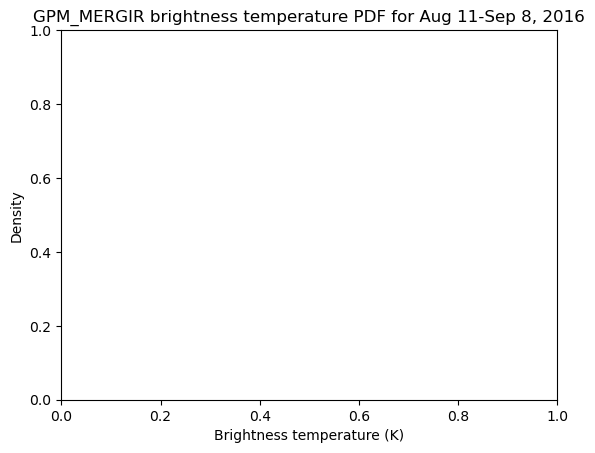

In [ ]:
plt.title("GPM_MERGIR brightness temperature PDF for Aug 11-Sep 8, 2016")

# x and y labels
plt.xlabel("Brightness temperature (K)")
plt.ylabel("Density")

# Plot PDF
plt.plot(GPM_OLR, sst.norm.pdf(GPM_OLR))
plt.show()